# Using Astropy/Astroplan for sunrise/sunset
Written by Logan A. Pearce, 2020

### Astropy:<br>
Astropy is a comprehensive astronomy python package with a huge suite of tools for all kinds of astronomy purposes, including observation planning.  You can find package info and install instructions here: https://www.astropy.org/  Astropy has great documentation and tutorials for using their tools, and the one for the observation planning tools is here: https://keflavich-astropy.readthedocs.io/en/latest/coordinates/observing-example.html

### Astroplan:<br>
Astroplan is a python package wrapper for astropy observing planning.  Docs here: https://astroplan.readthedocs.io/en/latest/ <br>
Both are installable via pip or conda

The astroplan sun_rise_time and sun_set_time functions use their own algorithm to compute sunrise/sunset times for given location and times (rather than pulling from an external database like USNO or NIST).  Discussion can be found in Section 9 of this document: https://buildmedia.readthedocs.org/media/pdf/astropy/v1.0.3/astropy.pdf

In [2]:
# Import necessary packages:
import astropy.units as u
from astroplan import Observer
from astropy.time import Time, TimeDelta
from astropy.coordinates import EarthLocation

# First make an Astropy Time object at midnight on Dec 1st 2019:
time = Time('2019-12-01 00:00:00')

# Make an array of 31 days in December:
# We tell astropy these are days by multiplying by
# the unit object u.day
times = time + np.arange(0,31,1)*u.day

# Define Tucson location:
tucson = EarthLocation(lat=32.2226*u.deg, lon=-110.9747*u.deg, height=728*u.m)

# Create an Astropy Observer object:
tuc = Observer(location=tucson, timezone="US/Arizona")

# Get sunrise/sunset times:
sun_rise = tuc.sun_rise_time(times, which="previous")
sun_set = tuc.sun_set_time(times, which="next")

# Astropy recieves these times in UTC, so we 
# have to convert to MST, which is +7 hrs from UTC:
sun_rise = sun_rise-7*u.hour
sun_set = sun_set-7*u.hour

# Compute the amount of daylight in a day, and convert 
# to units of hours using .to(u.hr):
daylight = (sun_set - sun_rise).to(u.hr)

# Display as a table:
print('Date        Sunrise      Sunset       Length of Daylight')
for i in range(len(times)):
    print(str(times[i]).split(' ')[0],str(sun_rise.iso[i]).split(' ')[1],str(sun_set.iso[i]).split(' ')[1],daylight[i])
    

Date        Sunrise      Sunset       Length of Daylight
2019-12-01 07:10:26.011 17:14:26.399 10.066774472594258 h
2019-12-02 07:11:17.102 17:14:20.529 10.050951875746247 h
2019-12-03 07:12:07.605 17:14:16.476 10.035797461867329 h
2019-12-04 07:12:57.450 17:14:14.240 10.021330598741766 h
2019-12-05 07:13:46.593 17:14:13.822 10.007563490420576 h
2019-12-06 07:14:34.988 17:14:15.217 9.994507860392329 h
2019-12-07 07:15:22.592 17:14:18.422 9.982174817472693 h
2019-12-08 07:16:09.363 17:14:23.432 9.970574911683794 h
2019-12-09 07:16:55.257 17:14:30.242 9.959718123078343 h
2019-12-10 07:17:40.234 17:14:38.843 9.949613772332665 h
2019-12-11 07:18:24.254 17:14:49.228 9.94027058780193 h
2019-12-12 07:19:07.278 17:15:01.386 9.931696638464924 h
2019-12-13 07:19:49.270 17:15:15.307 9.923899345099922 h
2019-12-14 07:20:30.453 17:15:30.979 9.916812781244513 h
2019-12-15 07:21:10.739 17:15:48.389 9.910458371043202 h
2019-12-16 07:21:49.867 17:16:07.522 9.904904119670388 h
2019-12-17 07:22:27.802 17:

In [3]:
# The astropy Time objects are complicated strings, so
# we need to pull out just the h:m:s information from each 
# day to do work with them.

# Start by making empty containers to store results:
sunrise, sunset = np.zeros(len(times)),np.zeros(len(times))
dates = np.zeros(len(times))

# We can access each component of the Time object by calling
# .hour, .minute, .sec, convert them to hours using the .to(u.hr)
# function, and sum them to get the sunrise and sunset times in 
# decimal hours, and store it in the appropriate array:
for i in range(len(times)):
    sunrise[i] = sun_rise.datetime[i].hour + sun_rise.datetime[i].minute*u.min.to(u.hr) + \
                 sun_rise.datetime[i].second*u.s.to(u.hr)
    sunset[i] = sun_set.datetime[i].hour + sun_set.datetime[i].minute*u.min.to(u.hr)+ \
                 sun_set.datetime[i].second*u.s.to(u.hr)
    dates[i] = times.datetime[i].day


Make the plots:

<IPython.core.display.Javascript object>


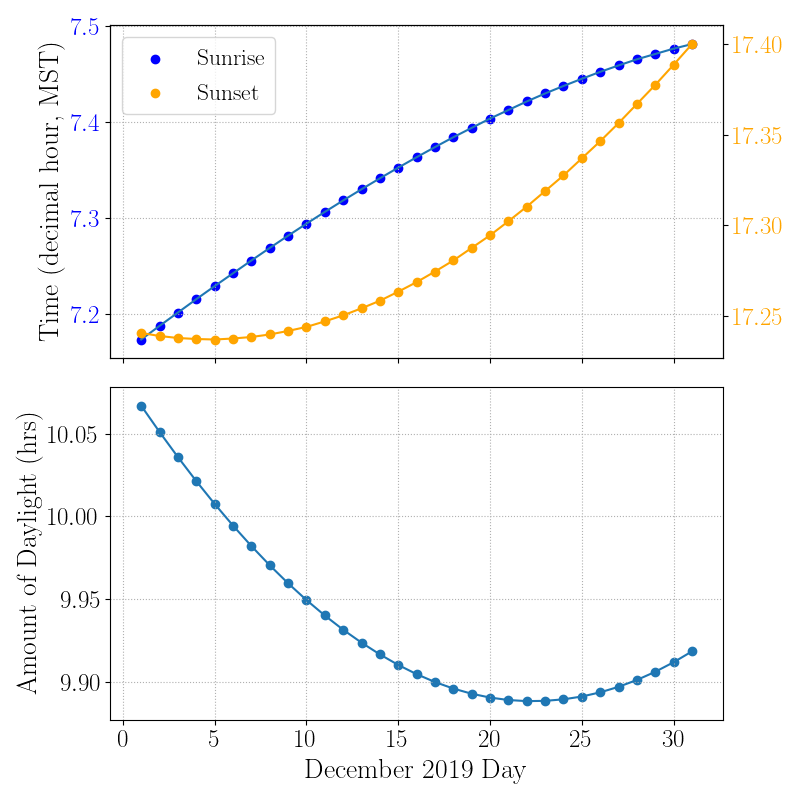

In [12]:
import matplotlib.pyplot as plt

# These settings make nice looking axis labels.
# text.usetex renders the plot labels using LaTex; if you
# don't have LaTex installed it will throw an error - just
# set it to False.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

%matplotlib notebook
fig, (ax1, ax3) = plt.subplots(2,1, figsize = (8,8), sharex=True)
# Sunrise/Sunset vs date:
ax1.plot(dates,sunrise)
sr = ax1.scatter(dates,sunrise,color='blue')
ax1.grid(ls=':')
ax1.set_ylabel('Time (decimal hour, MST)')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(dates,sunset, color='orange')
ss = ax2.scatter(dates,sunset, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.legend([sr, ss], ['Sunrise', 'Sunset'], fontsize = 17)
# Daylight hours vs date:
ax3.plot(dates, daylight)
ax3.scatter(dates, daylight)
ax3.set_ylabel('Amount of Daylight (hrs)')
ax3.set_xlabel('December 2019 Day')
ax3.grid(ls=':')
plt.tight_layout()
plt.show()
#plt.savefig('fig1.pdf')